In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

In [69]:
train_data = pd.read_csv('../data/artificial_dataset.csv')

In [70]:
train_data.head()

,Neighbourhood,Days,Month,Type of Accomodation,Smart Tax Percentage
0,el Barri Gòtic,1,July,Luxury,23
1,la Trinitat Nova,29,December,Budget,0
2,el Barri Gòtic,1,December,Luxury,10
3,el Barri Gòtic,1,March,Luxury,15
4,el Barri Gòtic,1,May,Luxury,19


In [71]:
neighbourhoods = pd.read_csv('../data/neighbourhoods.csv')

In [72]:
neighbourhoods.head()

,N_Barri,Area,Number of Air BnB Listings,Tourism,Numbers of Apartments,RANK
0,el Barri Gòtic,"841,905.08",1218,925,10479,20.5%
1,la Dreta de l'Eixample,"2,123,404.58",1918,947,27051,10.6%
2,el Raval,"1,098,392.91",1398,916,23285,9.9%
3,"Sant Pere, Santa Caterina i la Ribera","1,114,298.81",1041,302,14643,9.2%
4,la Barceloneta,"1,313,867.98",406,228,9233,6.9%


In [73]:
monthly_visitors = pd.read_csv('../data/monthly_visitors_percentage.csv')

In [74]:
monthly_visitors

,Month,Percentage
0,January,0.061647
1,February,0.067146
2,March,0.083657
3,April,0.096346
4,May,0.097943
5,June,0.096428
6,July,0.101374
7,August,0.095854
8,September,0.088963
9,October,0.082776


## Preprocessing

In [75]:
accomodation_types = ['Budget','Regular','Luxury']

In [76]:
def preprocessing(df):
    
    ranks = []
    accomodations = []
    months = []

    for index, row in df.iterrows():

        rank_str = neighbourhoods[neighbourhoods['N_Barri'] == row['Neighbourhood']]['RANK'].values[0]
        rank = float(rank_str.replace('%',''))
        ranks.append(rank)

        accomodations.append(2 ** accomodation_types.index(row['Type of Accomodation']))

        months.append(monthly_visitors[monthly_visitors['Month'] == row['Month']]['Percentage'].values[0])
        
    df['neighbourhood_rank'] = ranks
    df['accomodation_rank'] = accomodations
    df['month_rank'] = months
    
    df['1_over_days'] = 1 / df['Days']
    df.drop(columns=['Days'], inplace=True)
    
    df.drop(columns=['Neighbourhood','Month','Type of Accomodation'], inplace=True)    
    
    return df

In [77]:
target = 'Smart Tax Percentage'

rebalance = 4
train_data['Smart Tax Percentage'] = train_data['Smart Tax Percentage'] / rebalance

In [78]:
train_data = preprocessing(train_data)

In [79]:
train_data 

,Smart Tax Percentage,neighbourhood_rank,accomodation_rank,month_rank,1_over_days
0,5.75,20.5,4,0.101374,1.000000
1,0.00,0.2,1,0.059613,0.034483
2,2.50,20.5,4,0.059613,1.000000
3,3.75,20.5,4,0.083657,1.000000
4,4.75,20.5,4,0.097943,1.000000
5,3.75,20.5,4,0.088963,1.000000
6,2.50,0.2,1,0.101374,0.034483
7,1.25,0.2,1,0.097943,0.034483
8,1.25,0.2,1,0.088963,0.034483
9,5.75,20.5,4,0.101374,1.000000


In [80]:
train_data.max()

Smart Tax Percentage     5.750000
neighbourhood_rank      20.500000
accomodation_rank        4.000000
month_rank               0.101374
1_over_days              1.000000
dtype: float64

In [81]:
train_data.min()

Smart Tax Percentage    0.000000
neighbourhood_rank      0.200000
accomodation_rank       1.000000
month_rank              0.059613
1_over_days             0.034483
dtype: float64

## Linear Regression

In [82]:
target = 'Smart Tax Percentage'

features = list(train_data.columns)
features.remove(target)

In [83]:
train_x = train_data[features].values
train_y = train_data[target].values

In [84]:
minimum = train_data[features].min()
maximum = train_data[features].max()

train_x_norm = (train_data[features]-minimum) / (maximum-minimum).values

In [85]:
linear_regression = LinearRegression().fit(train_x, train_y)

In [86]:
linear_regression.coef_

array([ 1.20981676e-01, -5.76958294e-02,  6.63798770e+01,  1.09946661e+00])

In [87]:
test_data = pd.read_csv('../data/test_set.csv')

In [88]:
test_data.head()

,Neighbourhood,Days,Month,Type of Accomodation
0,el Barri Gòtic,3,September,Regular
1,la Sagrera,15,February,Budget


In [89]:
test_data = preprocessing(test_data)

In [90]:
test_data

,neighbourhood_rank,accomodation_rank,month_rank,1_over_days
0,20.5,2,0.088963,0.333333
1,0.7,1,0.067146,0.066667


In [91]:
gen_test_data = pd.read_csv('../data/gen_test_set.csv')
gen_test_data.drop(columns=['Unnamed: 0'], inplace=True)
gen_test_data.head()

,neighbourhood_rank,accomodation_rank,month_rank,1_over_days
0,4.1,4,0.068251,0.200000
1,1.3,1,0.101374,0.250000
2,5.3,1,0.101374,1.000000
3,20.5,4,0.059613,0.333333
4,4.1,2,0.101374,0.500000


In [92]:
test_x = gen_test_data[features].values

In [93]:
test_x

array([[ 4.1       ,  4.        ,  0.06825136,  0.2       ],
       [ 1.3       ,  1.        ,  0.10137434,  0.25      ],
       [ 5.3       ,  1.        ,  0.10137434,  1.        ],
       ...,
       [10.6       ,  4.        ,  0.10137434,  0.5       ],
       [20.5       ,  4.        ,  0.0671463 ,  0.33333333],
       [10.6       ,  1.        ,  0.10137434,  0.25      ]])

In [94]:
test_x_norm = (test_data[features]-minimum) / (maximum-minimum).values
test_x_norm

,neighbourhood_rank,accomodation_rank,month_rank,1_over_days
0,1.000000,0.333333,0.702800,0.309524
1,0.024631,0.000000,0.180381,0.033333


In [95]:
pred_y = linear_regression.predict(test_x)

In [96]:
pred_y

array([ 2.38991206e-01,  2.32700227e+00,  3.63552893e+00,  1.79630298e+00,
        2.88292179e+00,  2.38445092e+00,  1.95871671e+00,  9.54916303e-01,
        1.83159177e+00, -3.48744939e-01,  3.03842605e+00,  3.43265509e+00,
        3.32616678e+00, -3.36196431e-01,  4.42079492e+00, -1.30488865e-01,
        1.12637825e+00,  2.81931400e+00,  5.92536171e-01,  3.55391103e+00,
       -5.16372744e-01, -2.83090977e-01,  1.28230940e+00,  2.28833965e+00,
        1.95779254e+00,  1.70606721e+00,  2.05925038e+00,  1.03475603e+00,
        2.42647740e-01,  2.37574396e+00,  1.98803582e+00,  1.90973167e+00,
        2.60540376e+00, -3.16865297e-02,  2.67073639e+00,  2.29633263e+00,
        2.35328817e+00,  3.30974886e+00,  2.63187541e-01,  1.92100741e+00,
        1.19201502e+00,  2.48368225e+00,  4.22843478e+00,  1.85838724e+00,
        2.37539494e+00,  4.22571228e+00,  3.20666660e-01,  1.86891170e+00,
        4.40770941e+00,  2.05586811e+00,  8.59187212e-01,  6.75942777e-01,
        3.29643310e-01,  

In [97]:
gen_test_data['prediction'] = pred_y

In [98]:
gen_test_data.loc[gen_test_data['prediction'] < 0, 'prediction'] = 0

In [99]:
gen_test_data.head()

,neighbourhood_rank,accomodation_rank,month_rank,1_over_days,prediction
0,4.1,4,0.068251,0.200000,0.238991
1,1.3,1,0.101374,0.250000,2.327002
2,5.3,1,0.101374,1.000000,3.635529
3,20.5,4,0.059613,0.333333,1.796303
4,4.1,2,0.101374,0.500000,2.882922


In [100]:
gen_test_data.to_csv('../data/gen_test_data_with_labels.csv')

In [101]:
linear_regression.coef_

array([ 1.20981676e-01, -5.76958294e-02,  6.63798770e+01,  1.09946661e+00])

## Plotting Histogram over Season and Duration of Stay

In [102]:
n_days = 15
n_months = 12

plot_days = np.linspace(29,1,num=n_days)
plot_months = np.linspace(0,11,num=n_months)

days_grid, months_grid = np.meshgrid(plot_days, plot_months,indexing='ij')
predictions = np.ndarray(shape=(n_days,n_months))

In [103]:
sample = train_data.iloc[0]

for d in range(n_days):
    for m in range(n_months):

        day = days_grid[d,m]
        month = months_grid[d,m]
        
        one_over_day =  1 / day
        month_rank = monthly_visitors.at[int(month),'Percentage']       
        
        sample['month_rank'] = month_rank
        sample['1_over_days'] = one_over_day

        predictions[d,m] = linear_regression.predict([sample.drop(target)])

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [104]:
month_strings = list(reversed(['Dec', 'Nov','Oct', 'Sep', 'Aug', 'Jul', 'Jun', 'May', 'Apr', 'Mar', 'Feb', 'Jan']))

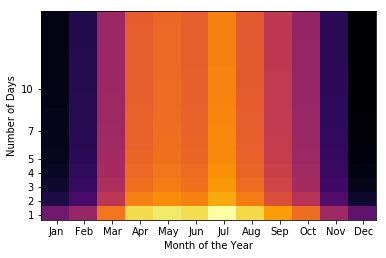

In [105]:
day_ticks = np.array([1,2,3,4,5,7,10])
month_repeat = 8
day_repeat = 4

fig, ax = plt.subplots()

im = ax.imshow(np.repeat(np.repeat(predictions, month_repeat, axis=1),day_repeat,axis=0), cmap='inferno')

ax.set_xticks((np.arange(len(month_strings)) * month_repeat) + month_repeat/2)
ax.set_xticklabels(month_strings)
ax.set_xlabel('Month of the Year')

ax.set_yticks((n_days - day_ticks) * day_repeat + day_repeat/2)
ax.set_yticklabels(day_ticks)
ax.set_ylabel('Number of Days')

# plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

plt.show()

## Scenario 1

In [119]:
neighbourhood_rank = 20.5
accomodation_rank = 2
month_rank = 0.101374336
days = 2
one_over_days = 1 / days
rate = 60

In [120]:
percentage = linear_regression.predict([[neighbourhood_rank, accomodation_rank, month_rank, one_over_days]])
tax = rate * (percentage / 100)

print(tax)

[2.92021277]


## Scenario 2

In [121]:
neighbourhood_rank = 3.5
accomodation_rank = 4
month_rank = 0.083656689
days = 7
one_over_days = 1 / days
rate = 30

In [122]:
percentage = linear_regression.predict([[neighbourhood_rank, accomodation_rank, month_rank, one_over_days]])
tax = rate * (percentage / 100)

print(tax)

[0.33785377]
